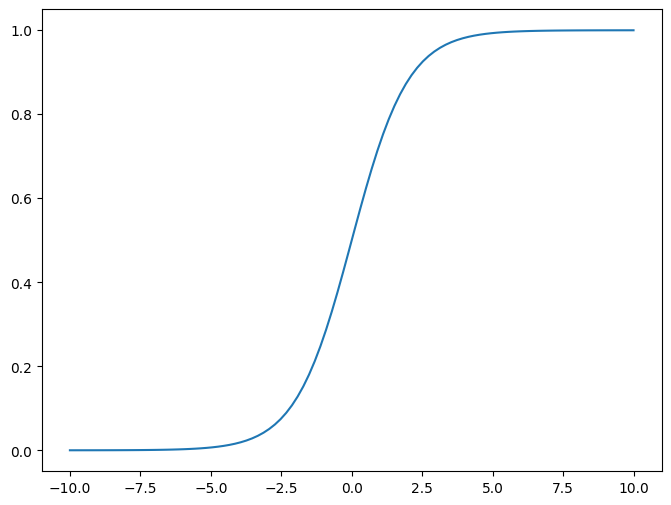

In [1]:
#plot sigmoid function
import numpy as np
import matplotlib.pyplot as plt
x= np.linspace(-10,10,100)
y= 1/(1+np.exp(-x))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y)


<Axes: xlabel='x', ylabel='y'>

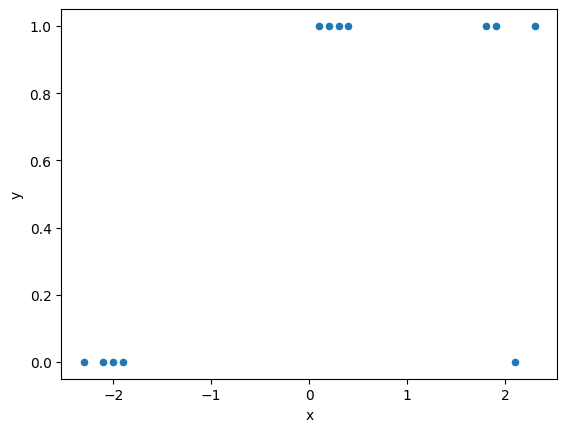

In [2]:
import pandas as pd
log_data = pd.DataFrame({'x':[-2,-2.3,-2.1,-1.9,0.2,0.4,0.1,0.3,2.1,1.9,2.3,1.8],
                         'y':[0,0,0,0,1,1,1,1,0,1,1,1]})
log_data.plot.scatter(x='x',y='y')


In [3]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(log_data[['x']],log_data['y'])


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [4]:
log_r.coef_

array([[0.83954426]])

In [5]:
log_r.intercept_

array([0.40927137])

Text(2, 0.4, 'Predict 1\nright of this')

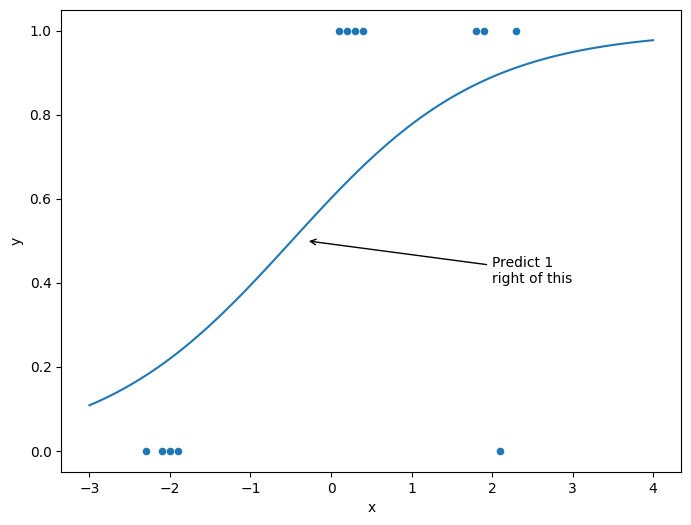

In [6]:
#plot fitted sigmoid function to top of data
x = np.linspace(-3,4,100)
y = 1/(1+np.exp(-(log_r.coef_[0][0]*x + log_r.intercept_[0])))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y)
log_data.plot.scatter(x='x',y='y',ax=ax)

#annotate above .5
ax.annotate('Predict 1\nright of this', xy=(-.31, .5), xytext=(2,.4), arrowprops={'arrowstyle':'->'})


In [9]:
log_r.predict([[-.3]])

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [12]:
#https://www.openml.org/da/1044
from datasets import load_dataset
eye = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/eye_movements.csv')



In [13]:
eye_df = eye['train'].to_pandas()
eye_df

,lineNo,assgNo,prevFixDur,firstfixDur,firstPassFixDur,nextFixDur,firstSaccLen,lastSaccLen,prevFixPos,landingPos,...,totalFixDur,meanFixDur,regressLen,regressDur,pupilDiamMax,pupilDiamLag,timePrtctg,titleNo,wordNo,label
0,9684.0,298.0,99.0,119.0,119.0,238.0,300.1666,288.0156,246.0732,56.6326,...,119.0,119.0000,0.0,0.0,0.1541,0.4446,0.0176,4,3,0
1,2065.0,66.0,119.0,159.0,239.0,100.0,306.1066,117.2359,321.0140,47.3207,...,239.0,119.5000,0.0,159.0,0.0119,0.3264,0.0239,8,1,0
2,1969.0,61.0,139.0,139.0,357.0,179.0,590.5294,805.0531,479.3078,112.3610,...,536.0,178.6667,258.0,0.0,0.0874,0.0859,0.0431,4,8,0
3,10326.0,315.0,199.0,139.0,219.0,99.0,80.9475,306.5587,153.1698,79.8389,...,198.0,99.0000,0.0,396.0,0.0173,0.1453,0.0264,4,2,0
4,6827.0,204.0,80.0,100.0,239.0,139.0,110.7576,161.4845,189.6207,96.7471,...,139.0,139.0000,0.0,378.0,0.3229,0.4074,0.0288,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,10923.0,336.0,219.0,219.0,219.0,119.0,277.4140,27.8568,281.0640,18.6078,...,219.0,219.0000,417.0,139.0,0.2830,0.4085,0.0187,9,4,1
7604,10924.0,336.0,219.0,119.0,278.0,139.0,27.8568,69.0290,111.3643,84.8528,...,278.0,139.0000,0.0,278.0,0.2830,0.4730,0.0237,9,3,1
7605,10925.0,336.0,219.0,219.0,219.0,119.0,69.0290,165.0273,55.7136,30.3026,...,139.0,139.0000,417.0,139.0,0.2830,0.4730,0.0119,9,4,1
7606,10926.0,336.0,139.0,179.0,179.0,80.0,165.0273,1445.4747,122.5887,38.3471,...,179.0,179.0000,0.0,0.0,0.2230,0.4730,0.0153,9,5,1


In [15]:
from sklearn.preprocessing import StandardScaler

X = eye_df.drop(columns=['label'])
y = eye_df['label']
std = StandardScaler()
X_scaled = std.fit_transform(X)
eye_log = LogisticRegression()
eye_log.fit(X_scaled,y)
eye_log.score(X_scaled,y)



0.5638801261829653

<Axes: >

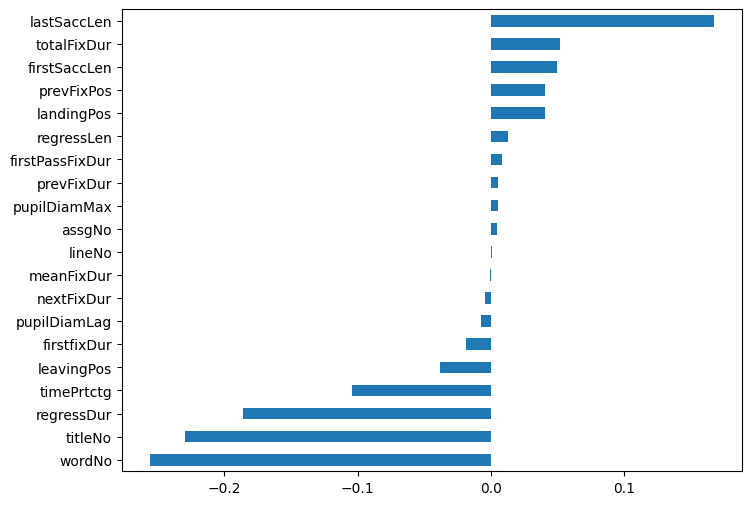

In [16]:
pd.Series(eye_log.coef_[0], index=X.columns).sort_values().plot.barh(figsize=(8,6))


In [17]:
# load titanic data
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
raw = pd.read_csv(url)
raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
# predict suvived column with logestic regression
from sklearn.linear_model import LogisticRegression

raw.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
titanic_X = ( raw 
             .loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
             .dropna()
)

titanic_X

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
885,3,39.0,0,5,29.1250
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
889,1,26.0,0,0,30.0000


In [27]:
# standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output='pandas')


std = StandardScaler()
X = std.fit_transform(titanic_X)
X

,Pclass,Age,SibSp,Parch,Fare
0,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,0.911232,0.365167,-0.551703,-0.505895,-0.503850
...,...,...,...,...,...
885,0.911232,0.640719,-0.551703,5.357890,-0.105320
886,-0.282566,-0.185937,-0.551703,-0.505895,-0.410245
887,-1.476364,-0.737041,-0.551703,-0.505895,-0.088774
889,-1.476364,-0.254825,-0.551703,-0.505895,-0.088774


In [30]:
#load train_test_split
from sklearn.model_selection import train_test_split


#split the data
y = raw.loc[X.index, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.7094972067039106

In [31]:
# try an XGBost model
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)



0.6815642458100558